# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [ ]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
print('**************')
!ls "/content/drive/My Drive/Colab Notebooks/LSTM/Data"
print('**************')

**************
glove.6B.200d.txt  glove.6B.zip  Sarcasm_Headlines_Dataset.json
**************


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import keras

Using TensorFlow backend.


In [4]:
#Set your project path 
project_path =  "/content/drive/My Drive/Colab Notebooks/LSTM"

In [5]:
!ls "/content/drive/My Drive/Colab Notebooks/LSTM/Notebooks"

'1. Text Classification with RNN'
 2c_Sentiment_Analysis_Glove_Embedding_LSTM.ipynb
'2. Sentiment_Analysis_Google_Word2Vec_Embedding_LSTM.ipynb'
'2. Time Series with RNN'
'3. Language Modeling'
'4. Seq2Seq Model'
 NLP_Project_Sarcasm_Detection_Questions.ipynb


In [6]:
project_path

'/content/drive/My Drive/Colab Notebooks/LSTM'

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [7]:
df_Sarcasm = pd.read_json(project_path + "/Data/Sarcasm_Headlines_Dataset.json", lines= True)

In [8]:
df_Sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


In [9]:
df_Sarcasm.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [10]:
df_Sarcasm.isnull().count()

article_link    26709
headline        26709
is_sarcastic    26709
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf5b973a58>]],
      dtype=object)

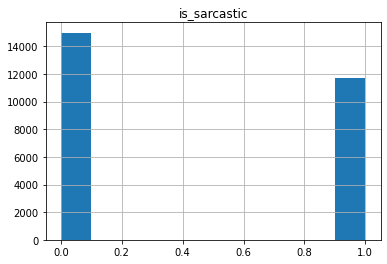

In [11]:
df_Sarcasm.hist()

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [12]:
df_Sarcasm.drop('article_link', axis = 1, inplace=True)

In [13]:
df_Sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      26709 non-null  object
 1   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 417.5+ KB


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [14]:
"""
maxLength = 0
def LineLength(text):
  if(len(text) > maxLength):
    maxLength = len(text)


def MaxLength():
  maxLength = 0
  lineLength = df_Sarcasm['headline'].apply(LineLength)
  if(lineLength > maxLength):
    maxLength = lineLength
  return maxLength
"""

"\nmaxLength = 0\ndef LineLength(text):\n  if(len(text) > maxLength):\n    maxLength = len(text)\n\n\ndef MaxLength():\n  maxLength = 0\n  lineLength = df_Sarcasm['headline'].apply(LineLength)\n  if(lineLength > maxLength):\n    maxLength = lineLength\n  return maxLength\n"

In [15]:
maxLength = len(df_Sarcasm.headline.max())

#**## Modelling**

## Import required modules required for modelling.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = maxLength
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_Sarcasm['headline'])

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(df_Sarcasm['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(df_Sarcasm['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
   307 15114   678  3336  2297    47   381  2575 15115     5  2576  8433]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [20]:
tokenizer.word_index

{'to': 1,
 'of': 2,
 'the': 3,
 'in': 4,
 'for': 5,
 'a': 6,
 'on': 7,
 'and': 8,
 'with': 9,
 'is': 10,
 'new': 11,
 'trump': 12,
 'man': 13,
 'from': 14,
 'at': 15,
 'about': 16,
 'you': 17,
 'this': 18,
 'by': 19,
 'after': 20,
 'up': 21,
 'out': 22,
 'be': 23,
 'how': 24,
 'as': 25,
 'it': 26,
 'that': 27,
 'not': 28,
 'are': 29,
 'your': 30,
 'his': 31,
 'what': 32,
 'he': 33,
 'all': 34,
 'just': 35,
 'who': 36,
 'has': 37,
 'will': 38,
 'more': 39,
 'one': 40,
 'into': 41,
 'report': 42,
 'year': 43,
 'why': 44,
 'have': 45,
 'area': 46,
 'over': 47,
 'donald': 48,
 'u': 49,
 'day': 50,
 'says': 51,
 's': 52,
 'can': 53,
 'first': 54,
 'woman': 55,
 'time': 56,
 'like': 57,
 'her': 58,
 "trump's": 59,
 'old': 60,
 'no': 61,
 'get': 62,
 'off': 63,
 'an': 64,
 'life': 65,
 'people': 66,
 'obama': 67,
 'now': 68,
 'house': 69,
 'still': 70,
 "'": 71,
 'women': 72,
 'make': 73,
 'was': 74,
 'than': 75,
 'white': 76,
 'back': 77,
 'my': 78,
 'i': 79,
 'clinton': 80,
 'down': 81,
 'i

#**## Word Embedding**

## Get Glove Word Embeddings

In [21]:
glove_file = project_path + "/Data/glove.6B.zip"

In [22]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [23]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd



# Create a weight matrix for words in training docs

In [24]:
num_words = len(tokenizer.word_index) + 1

embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [25]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

In [26]:
model = Sequential()

In [27]:
model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 200)         5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 256)         336896    
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
dense (Dense)                (None, None, 64)          16448     
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           65        
Total params: 6,284,809
Trainable params: 6,284,809
Non-trainable params: 0
_________________________________________________________________


# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [30]:
batch_size = 100
epochs = 5

## Add your code here ##
model.fit(X,y,
          epochs=epochs,
          batch_size=batch_size,
          verbose = 1,
          validation_split=0.2)

Epoch 1/5
214/214 [==============================] - 181s 844ms/step - loss: 0.4467 - accuracy: 0.7900 - val_loss: 0.3607 - val_accuracy: 0.8459
Epoch 2/5
214/214 [==============================] - 181s 848ms/step - loss: 0.2419 - accuracy: 0.9088 - val_loss: 0.3458 - val_accuracy: 0.8627
Epoch 3/5
214/214 [==============================] - 180s 840ms/step - loss: 0.1392 - accuracy: 0.9534 - val_loss: 0.4028 - val_accuracy: 0.8605
Epoch 4/5
214/214 [==============================] - 176s 825ms/step - loss: 0.0668 - accuracy: 0.9791 - val_loss: 0.4008 - val_accuracy: 0.8495
Epoch 5/5
214/214 [==============================] - 180s 843ms/step - loss: 0.0445 - accuracy: 0.9875 - val_loss: 0.4982 - val_accuracy: 0.8461


# Validation Accuracy : 86.27

In [31]:
y_pred = model.predict(X)

In [ ]:
#from sklearn.metrics import  mean_squared_error
#train_RMSE = np.sqrt(mean_squared_error(y, y_pred))